In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy as np

import mplhep as hep
plt.style.use(hep.style.CMS)

In [31]:
def trigger_eff_curve(csv_file, trigger, year):
    
    ## Variables section
    
    # Takes the dataframe
    df = pd.read_csv(csv_file)
    
    # Takes from dataframe lower pt value (if the bin is 20-21 GeV, it takes 20 GeV)
    pt_first = df['First_pt[GeV/c]']
    
    # Takes from dataframe higher pt value (if the bin is 20-21 GeV, it takes 21 GeV)
    pt_second = df['Second_pt[GeV/c]']
    
    # Takes te mean between lower and higher values
    pt_md = (pt_first + pt_second)/2
    
    # Takes the left value w.r.t to the mean
    pt_dif_left = pt_md - pt_first
    
    # Takes the right value w.r.t to the mean
    pt_dif_right = pt_second - pt_md
    
    # Takes the asymmetric values
    pt_asymmetric = [pt_dif_left, pt_dif_right]
    
    # Takes the efficiency value
    eff = df['Efficiency_Value']
    
    # Takes the assymetri error
    eff_asymmetric_err = (df['Efficiency_Error_up'], df['Efficiency_Error_down'])
    
    ## Plot section
    
    fig, ax = plt.subplots()
    # Attributes xaxis and yaxis
    hep.cms.label(data=False, year=year)
    #ax.plot(integrated_charge, current, marker='s', linestyle=None, linewidth=0)
    plt.errorbar(x=pt_md, y=eff, yerr=eff_asymmetric_err, xerr=pt_asymmetric, markersize=10, marker='8', linestyle='', color='red', label=trigger) #label=leg), marker='.', linestyle=None, linewidth=0)

    ax.set_xlabel(r'p$_T(\mu^+\mu^-)$ $[GeV/c]$', fontsize = 22)
    ax.set_ylabel('Efficiency', fontsize = 22)
    ax.legend()
    ax.set_ylim(0, 1.1)
    
    

In [32]:
csv_file = 'trigger_mc_efficiency_2017.csv'
trigger = 'HLT_Dimuon25_Jpsi'
year = 2017
trigger_eff_curve(csv_file, trigger, year)

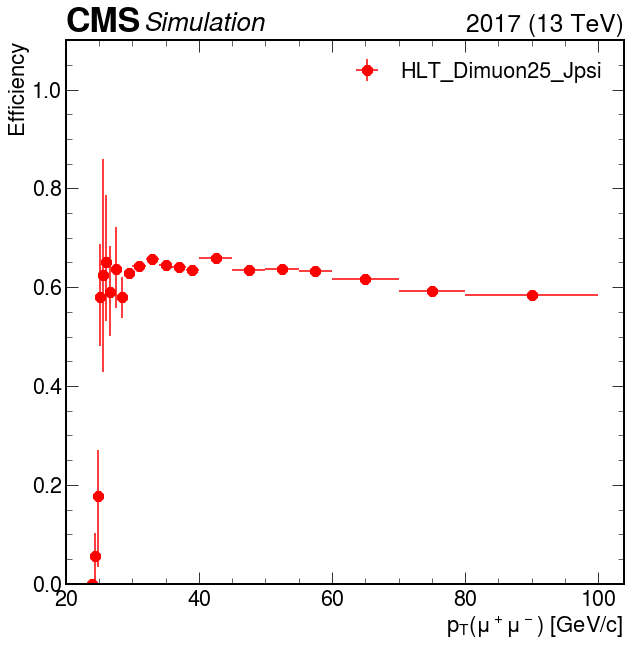